In [44]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [9]:
import w3_tools

In [12]:
m = 30
X, Y = make_regression(n_samples = m, n_features = 1, noise = 20, random_state = 1)

X = X.reshape((1,m))
Y = Y.reshape((1,m))

print('Training dataset X: ')
print(X)
print('Training dataset Y: ')
print(Y)

Training dataset X: 
[[ 0.3190391  -1.07296862  0.86540763 -0.17242821  1.14472371  0.50249434
  -2.3015387  -0.68372786 -0.38405435 -0.87785842 -2.06014071 -1.10061918
  -1.09989127  1.13376944  1.74481176 -0.12289023 -0.93576943  1.62434536
   1.46210794  0.90159072 -0.7612069   0.53035547 -0.52817175 -0.26788808
   0.58281521  0.04221375  0.90085595 -0.24937038 -0.61175641 -0.3224172 ]]
Training dataset Y: 
[[ -3.01854669 -65.65047675  26.96755728   8.70562603  57.94332628
   -0.69293498 -78.66594473 -12.73881492 -13.26721663 -24.80488085
  -74.24484385 -39.99533724 -22.70174437  73.46766345  55.7257405
   23.80417646 -13.45481508  25.57952246  75.91238321  50.91155323
  -43.7191551   -1.7025559  -16.44931235 -33.54041234  20.4505961
   18.35949302  37.69029586  -1.04801683  -4.47915933 -20.89431647]]


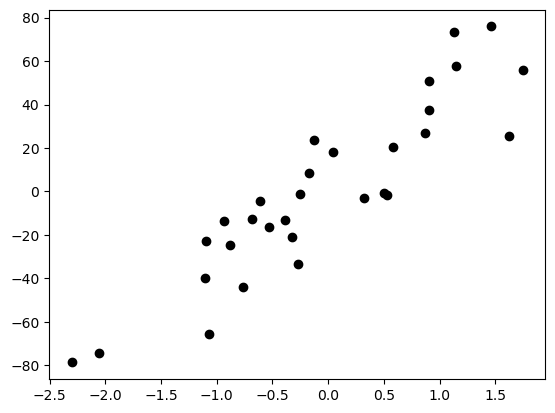

In [13]:
plt.scatter(X,Y, c = "black")

In [38]:
def layer_sizes(X,Y):
    n_x = X.shape[0]
    n_y = Y.shape[0]

    return(n_x,n_y)

In [40]:
(n_x, n_y) = layer_sizes(X, Y)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 1
The size of the output layer is: n_y = 1


In [45]:
def initialize_parameters(n_x, n_y):
 
    W = np.random.randn(n_y, n_x) * 0.01
    b = np.zeros((n_y, 1))
    ### END CODE HERE ###
    
    assert (W.shape == (n_y, n_x))
    assert (b.shape == (n_y, 1))
    
    parameters = {"W": W,
                  "b": b}
    
    return parameters


In [46]:

parameters = initialize_parameters(n_x, n_y)
print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

W = [[0.01747415]]
b = [[0.]]


In [47]:
def forward_parameters(X,parameters):
    W = parameters["W"]
    b = parameters["b"]

    Z = np.dot(W,X) + b
    Y_hat = Z

    assert(Y_hat.shape == (n_y,X.shape[1]))
    return Y_hat

In [50]:
Y_hat = forward_parameters(X,parameters)
print(Y_hat)

[[ 0.00557494 -0.01874922  0.01512227 -0.00301304  0.02000308  0.00878066
  -0.04021744 -0.01194757 -0.00671102 -0.01533983 -0.03599921 -0.01923239
  -0.01921967  0.01981166  0.03048911 -0.0021474  -0.01635178  0.02838406
   0.0255491   0.01575453 -0.01330145  0.00926751 -0.00922935 -0.00468112
   0.0101842   0.00073765  0.01574169 -0.00435754 -0.01068993 -0.00563397]]


In [51]:
def compute_cost(Y_hat,Y):
    m = Y.shape[1]

    cost = np.sum((Y_hat-Y)**2)/(2*m)

    return cost

In [52]:
print("cost = " + str(compute_cost(Y_hat, Y)))

cost = 790.2339208902725


In [60]:
parameters = w3_tools.train_nn(parameters, Y_hat, X, Y)

print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

W = [[87.25004643]]
b = [[0.35846968]]


In [68]:
def nn_model(X,Y,num_iterations = 10, print_cost = False):
    n_x = layer_sizes(X,Y)[0]
    n_y = layer_sizes(X,Y)[1]

    parameters = initialize_parameters(n_x,n_y)
    #LOOP
    for i in range(0,num_iterations):
        Y_hat = np.dot(parameters["W"],X)+parameters["b"]

        cost = np.sum((Y_hat - Y)**2)/(2*Y.shape[1])

        parameters = w3_tools.train_nn(parameters, Y_hat, X, Y) 

        if print_cost:
            print ("Cost after iteration %i: %f" %(i, cost))
    return parameters

In [71]:
parameters = nn_model(X,Y,num_iterations = 15, print_cost = True)
print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

W_simple = parameters["W"]
b_simple = parameters["b"]

Cost after iteration 0: 790.980084
Cost after iteration 1: 176.504595
Cost after iteration 2: 143.770401
Cost after iteration 3: 141.433458
Cost after iteration 4: 141.248732
Cost after iteration 5: 141.233727
Cost after iteration 6: 141.232500
Cost after iteration 7: 141.232400
Cost after iteration 8: 141.232391
Cost after iteration 9: 141.232391
Cost after iteration 10: 141.232391
Cost after iteration 11: 141.232391
Cost after iteration 12: 141.232391
Cost after iteration 13: 141.232391
Cost after iteration 14: 141.232391
W = [[35.71958208]]
b = [[2.2893077]]


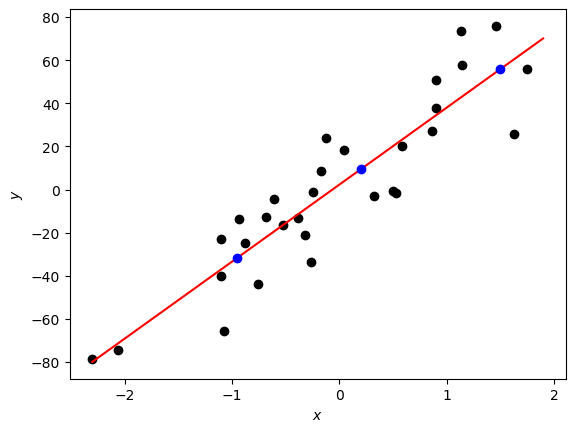

In [72]:
X_pred = np.array([-0.95, 0.2, 1.5])

fig, ax = plt.subplots()
plt.scatter(X, Y, color = "black")

plt.xlabel("$x$")
plt.ylabel("$y$")
    
X_line = np.arange(np.min(X[0,:]),np.max(X[0,:])*1.1, 0.1)
ax.plot(X_line, W_simple[0,0] * X_line + b_simple[0,0], "r")
ax.plot(X_pred, W_simple[0,0] * X_pred + b_simple[0,0], "bo")
plt.plot()
plt.show()